In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Modeling Libraries
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('liver.csv')

In [4]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Dataset']=df['Dataset'].replace(2,0)

In [6]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
df["Albumin_and_Globulin_Ratio"].fillna(df["Albumin_and_Globulin_Ratio"].mean(), inplace = True)

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [11]:
df = df.fillna(method='ffill')

In [12]:
df.dtypes[df.dtypes=='object']


Series([], dtype: object)

In [13]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [14]:
for col in df.columns:
    if col in ['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']:
        upper_limit = df[col].mean() + 3*df[col].std()
        lower_limit = df[col].mean() - 3*df[col].std()
        df[col] = np.where(df[col]>upper_limit,upper_limit,np.where(df[col]<lower_limit,lower_limit,df[col]))
        

In [15]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.065978,1.386141,279.651551,69.539144,97.535160,6.485215,3.141852,0.943475,0.713551
std,16.189833,0.429603,4.845322,2.378096,188.905335,106.839450,164.832774,1.078940,0.795519,0.303222,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,3.226836,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,21.927364,9.911599,1019.390297,628.574619,976.666393,9.600000,5.500000,1.902540,1.000000


In [16]:
df['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

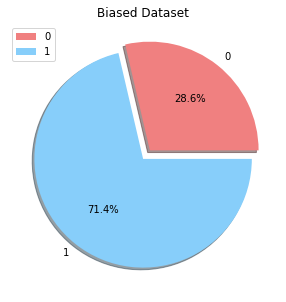

In [17]:
plt.figure(figsize=(5,5))
pie_labels=["0","1"]
pie_list=[df[df['Dataset']==0].shape[0],df[df['Dataset']==1].shape[0]]
colors = ['lightcoral', 'lightskyblue']
plt.pie(pie_list,labels=pie_labels, colors=colors,shadow=True,autopct="%1.1f%%", explode=(0.1,0))
plt.legend()
plt.title("Biased Dataset")
plt.show()

In [18]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [19]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=10)
X_res,y_res=os.fit_resample(X,Y)
print(type(y_res))

<class 'numpy.ndarray'>


In [20]:
X_res.shape,y_res.shape

((832, 10), (832,))

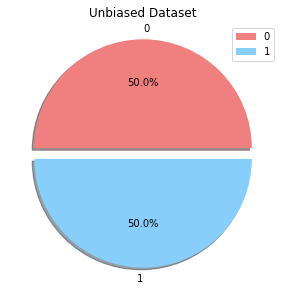

In [21]:
df_y = pd.DataFrame({ 'Dataset': np.array(y_res) })
plt.figure(figsize=(5,5))
pie_labels=["0","1"]
pie_list=[df_y[df_y['Dataset']==0].shape[0],df_y[df_y['Dataset']==1].shape[0]]
colors = ['lightcoral', 'lightskyblue']
plt.pie(pie_list,labels=pie_labels, colors=colors,shadow=True,autopct="%1.1f%%", explode=(0.1,0))

plt.legend()
plt.title("Unbiased Dataset")
plt.show()

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_res, y_res)
print(model.feature_importances_)

[0.09973565 0.03161483 0.13135741 0.10985789 0.12407851 0.12166846
 0.11906301 0.08267782 0.09429317 0.08565325]


In [23]:
feature_importance = pd.DataFrame(model.feature_importances_)
lst=list(feature_importance.sort_values(0,ascending=False).head(8).index)
lst.sort()
lst

[0, 2, 3, 4, 5, 6, 8, 9]

In [24]:
X = X_res[:,lst]

In [25]:
for i in lst:
    print(df.columns[i])
    print(df[df.columns[i]].value_counts())

Age
60    34
45    25
50    23
38    21
42    21
      ..
8      1
78     1
84     1
85     1
90     1
Name: Age, Length: 72, dtype: int64
Total_Bilirubin
0.8     91
0.7     77
0.9     57
0.6     46
1.0     28
        ..
9.4      1
15.2     1
4.4      1
11.0     1
10.6     1
Name: Total_Bilirubin, Length: 98, dtype: int64
Direct_Bilirubin
0.2    194
0.1     63
0.3     51
0.8     22
0.4     21
      ... 
5.1      1
5.2      1
2.8      1
7.8      1
3.9      1
Name: Direct_Bilirubin, Length: 64, dtype: int64
Alkaline_Phosphotase
1019.390297    15
198.000000     11
298.000000     11
215.000000     11
195.000000     10
               ..
850.000000      1
664.000000      1
114.000000      1
367.000000      1
415.000000      1
Name: Alkaline_Phosphotase, Length: 250, dtype: int64
Alamine_Aminotransferase
25.0     25
20.0     23
22.0     18
28.0     17
18.0     17
         ..
440.0     1
189.0     1
51.0      1
482.0     1
322.0     1
Name: Alamine_Aminotransferase, Length: 144, dtype: int64
A

In [26]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

In [27]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (665, 8)
X_test shape: (167, 8)
Y_train shape: (665,)
Y_test shape: (167,)


In [28]:
'''X_opt = np.array(X_train[:,[0,1,2,3, 4, 5,6, 7,8,9]]).astype(float)
X2 = sm.add_constant(X_opt)
regressor_OLS = sm.OLS(Y_train,X2).fit()
regressor_OLS.summary()'''

'X_opt = np.array(X_train[:,[0,1,2,3, 4, 5,6, 7,8,9]]).astype(float)\nX2 = sm.add_constant(X_opt)\nregressor_OLS = sm.OLS(Y_train,X2).fit()\nregressor_OLS.summary()'

In [29]:
#X_train = X_train[:,[0,1,3,4,6,7,8]]
#X_test = X_test[:,[0,1,3,4,6,7,8]]

In [30]:
def evaluate_model(models):
   
    result_train = []
    result_test = []
    for model in models :
        trained_model = model.fit(X_train, Y_train)
        Y_pred = trained_model.predict(X_test)
        accuracy_test = accuracy_score(Y_test, Y_pred)
        accuracy_train = accuracy_score(Y_train, trained_model.predict(X_train))
        result_train.append(accuracy_train*100)
        result_test.append(accuracy_test*100)
        

    result_df = pd.DataFrame({
        "Accuracy Training Set":result_train,
        "Accuracy Testing Set":result_test,
        "Models":[
            "Logistic Regression",
            "Decision Tree Classifier",
            "AdaBoost Classifier",
            "Support Vector Machine",
            "Random Forest Classifier",
            "Gradient Boosting Classifier",
            "XGBoost",
            "Naive Bayes",
            "K-Nearest Neighbors Classifier",
            "LightGBM"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "Accuracy Testing Set", y = "Models", data = result_df, orient = "h",order=result_df.sort_values('Accuracy Testing Set',ascending = False).Models.head())
    bar.set_xlabel("Accuracy")
    bar.set_title("Accuracy Scores")
    return result_df.sort_values('Accuracy Testing Set',ascending = False)

[23:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy Training Set,Accuracy Testing Set,Models
4,100.000000,89.221557,Random Forest Classifier
6,100.000000,88.023952,XGBoost
9,100.000000,86.826347,LightGBM
1,100.000000,82.035928,Decision Tree Classifier
5,92.330827,81.437126,Gradient Boosting Classifier
2,81.503759,76.646707,AdaBoost Classifier
8,85.112782,74.251497,K-Nearest Neighbors Classifier
7,67.218045,73.053892,Naive Bayes
0,69.624060,70.059880,Logistic Regression
3,66.165414,67.664671,Support Vector Machine


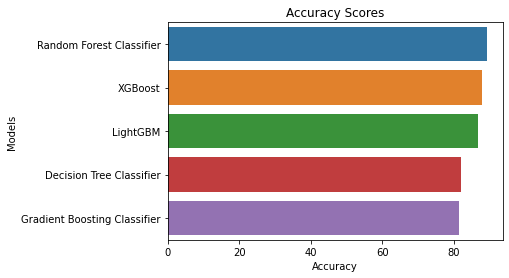

In [31]:
# Modeling step Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(n_estimators=50,learning_rate=1),
    SVC(),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    XGBClassifier(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=3),
    lgb.LGBMClassifier()
]
evaluate_model(models)

Accuracy: 89.22%


Text(16.5, 0.5, 'Predicted Label')

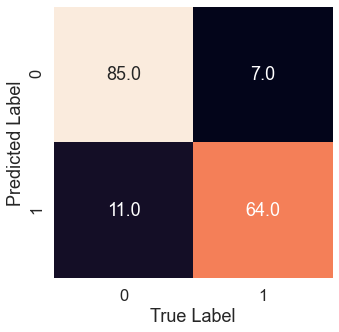

In [32]:
classifier = RandomForestClassifier(random_state = 30)

model = classifier.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: " + str(round((accuracy * 100),2))+"%")


sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cbar=False,fmt=".1f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

## Hyperparameter Tuning

### Decision Tree

In [33]:
# Splitting X and Y

X_train, X_test, Y_train, Y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [34]:
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

tuning = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 4 folds for each of 50 candidates, totalling 200 fits


({'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5},
 0.7398726643099344)

In [35]:
classifier=DecisionTreeClassifier(max_depth= 5,min_samples_leaf=5,criterion='gini')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.7245508982035929


### Support Vector Machine

In [36]:
# Splitting X and Y

X_train, X_test, Y_train, Y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [37]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly'],
             'degree': [0, 1, 2, 3, 4, 5, 6]}
 
tuning=GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=2,verbose=1,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 2 folds for each of 525 candidates, totalling 1050 fits


({'C': 1000, 'degree': 0, 'gamma': 1, 'kernel': 'rbf'}, 0.7443829371540215)

In [38]:
classifier=SVC(C=1000,gamma=1,kernel='rbf',degree=0,random_state=10)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.8203592814371258


### Naive Bayes

In [36]:
param_grid={'var_smoothing': np.logspace(0,-9, num=100)}
tuning=GridSearchCV(estimator=GaussianNB(), param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


({'var_smoothing': 0.001}, 0.6766917293233083)

In [37]:
classifier=GaussianNB(var_smoothing=0.001)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.7305389221556886


### KNN

In [38]:
param_grid =[ { 'n_neighbors' : range(0,20,1),
               'algorithm':['auto','ball_tree','kd_tree','brute'],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
              'p':[0,1,2,3]}]
tuning=GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


({'algorithm': 'auto',
  'metric': 'minkowski',
  'n_neighbors': 1,
  'p': 2,
  'weights': 'uniform'},
 0.8165413533834587)

In [39]:
classifier=KNeighborsClassifier(algorithm='auto',metric= 'minkowski',n_neighbors=1,p=2,weights='uniform')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.8323353293413174


### Random Forest

In [32]:
# Splitting X and Y

X_train, X_test, Y_train, Y_test = train_test_split(X, y_res, test_size = 0.20, random_state = 42)

#sc = StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)

In [33]:
param_grid={'n_estimators':range(80,201,5),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2',None]}

tuning=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


({'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 110},
 0.8225563909774436)

In [33]:
classifier=RandomForestClassifier(n_estimators=110,criterion='gini',max_features='sqrt',random_state=30)
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.9041916167664671


Accuracy: 90.42%


Text(16.5, 0.5, 'Predicted Label')

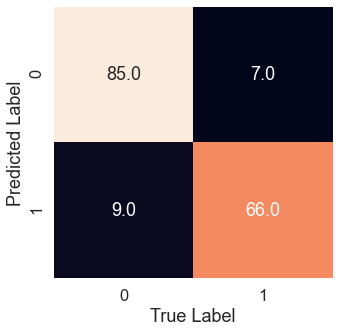

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: " + str(round((accuracy * 100),2))+"%")


sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,cbar=False,fmt=".1f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

### Logistic Regression

In [43]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
tuning = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, verbose = True, cv=5, n_jobs = -1,scoring='accuracy')
tuning.fit(X_train,Y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


({'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'},
 0.7022556390977444)

In [201]:
classifier=LogisticRegression(C= 0.1, max_iter= 100, penalty= 'l1', solver= 'saga')
model=classifier.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print('Test set accuracy: ', accuracy_score(Y_test, y_pred))

Test set accuracy:  0.7005988023952096


In [35]:
model

RandomForestClassifier(max_features='sqrt', n_estimators=110, random_state=30)

In [36]:
import pickle
pickle.dump(model,open(r'C:\Users\antar\PycharmProjects\HealthCareSystem\Liver.pkl','wb'))

## ANN

In [202]:
#500 Training
x_train = X[:525]
y_train = Y[:525]

#35 Validation
x_val = X[526:554]
y_val = Y[526:554]

#34 Testing
x_test = X[555:]
y_test = Y[555:]

In [203]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation



# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu',input_dim=10))
# Adding the second hidden layer
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
# Output layer => output dimension = 1
model.add(Dense(1, activation = 'sigmoid'))

In [204]:
# Compiling the ANN
model.compile( loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(x_train,y_train, epochs=100, batch_size=5, validation_data=(x_val,y_val))

Epoch 1/100


ValueError: in user code:

    c:\users\antar\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\users\antar\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\antar\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\antar\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\antar\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\antar\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\users\antar\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    c:\users\antar\appdata\local\programs\python\python39\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\antar\appdata\local\programs\python\python39\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 10 but received input with shape (5, 7)


In [413]:
print("Test Score:", model.evaluate(x_test,y_test))

1/1 [==============================] - 0s 16ms/step - loss: 1.5426 - accuracy: 0.7500
Test Score: [1.5426437854766846, 0.75]


In [414]:
print("Validation Score:", model.evaluate(x_val,y_val))

1/1 [==============================] - 0s 18ms/step - loss: 2.4061 - accuracy: 0.7857
Validation Score: [2.4061226844787598, 0.7857142686843872]


In [427]:
input_data = (10,2,1.9,0.9,180,25,34,7.4,4.3,1.23)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = grid.transform(input_data_reshaped)

prediction = model.predict(input_data_reshaped)

if (prediction[0] == 1):
    print('No Disease')
else:
    print('Disease')

No Disease


In [424]:
input_data = (61,2,0.5,0.1,545,20,34,5.9,2.4,0.37)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = grid.transform(input_data_reshaped)

prediction = model.predict(input_data_reshaped)

if (prediction[0] == 1):
    print('No Disease')
else:
    print('Disease')

No Disease
